# ПРАКТИКУМ 2.

# Завдання:
1. Завантажте набір даних.
2. Виведіть заголовок таблиці (перші 5 записів).
3. В якому вигляді мітки класів?
4. В якому форматі характеристики об’єктів? Чи є характеристики у вигляді
тексту? Якщо так, факторизувати (перетворити на числа) дані в таких
стовпцях.
5. Наскільки збалансовані класи?
6. Створити навчальний набір предикторів X та цілей Y. Перетворити мітки
класів до формату One hot encoding.
7. Розбити набір даних на навчальну та тестову множини.
8. Стандартизувати предиктори X.
9. Створити модель нейронної мережі прямого розповсюдження. Обрати
архітектуру, активаційні функції, оптимізатор, критерії якості та метрики.
Якщо даних мало, не використовувати валідаційну множину.
10. Навчити нейронну мережу (кілька разів?).
11. Оцінити якість роботи навченої мережі на тестовій множині.
12. Побудувати графік залежності критерію якості (або метрики) від номеру
ітерації навчання. Проаналізувати графік і, за потреби, перенавчити
мережу, врахувавши отриману інформацію.
13. Подати на вхід навченої мережі довільний зразок із тестової вибірки. За
результатами вивести наступне повідомлення: «Передбачено клас {мітка
класу} з достовірністю {Р}%».
14. Використовуючи мінімум 3 різних підходи до оптимізації нейронних
мереж, спробувати покращити початковий результат навчання.

## Варіант 12 

Набір даних: музика (music.csv).
Опис даних: В наборі містяться дані про музичні композиції. За цими даними
потрібно навчитись визначати, до якого жанру належить композиція. Мітки
класів наведені у стовпці «label». Стовпець «filename» необхідно видалити із
набору даних перед аналізом
Кількість класів:10 (hiphop/blues/metal/jazz/rock/country/disco/pop/reggae/classical).


In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# 1. Завантажте набір даних
df = pd.read_csv('music.csv')

In [3]:
# 2. Виведіть заголовок таблиці (перші 5 записів)
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [4]:
# 3. В якому вигляді мітки класів?
#  Мітки класів представлені у вигляді тексту (рядків), наприклад 'blues', 'classical' тощо.
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [5]:
# 4. В якому форматі характеристики об’єктів?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   chroma_stft         1000 non-null   float64
 2   rmse                1000 non-null   float64
 3   spectral_centroid   1000 non-null   float64
 4   spectral_bandwidth  1000 non-null   float64
 5   rolloff             1000 non-null   float64
 6   zero_crossing_rate  1000 non-null   float64
 7   mfcc1               1000 non-null   float64
 8   mfcc2               1000 non-null   float64
 9   mfcc3               1000 non-null   float64
 10  mfcc4               1000 non-null   float64
 11  mfcc5               1000 non-null   float64
 12  mfcc6               1000 non-null   float64
 13  mfcc7               1000 non-null   float64
 14  mfcc8               1000 non-null   float64
 15  mfcc9               1000 non-null   float64
 16  mfcc10 

In [6]:
# Перевірка на текстові поля (object)
categorical_cols = df.select_dtypes(include=['object']).columns
list(categorical_cols)

['filename', 'label']

In [7]:
# 'filename' видалити, якщо існує
if 'filename' in df.columns:
    df = df.drop('filename', axis=1)
    print("\nСтовпець 'filename' видалено.")


Стовпець 'filename' видалено.


In [8]:
# 5. Наскільки збалансовані класи?
class_counts = df['label'].value_counts()
class_counts

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

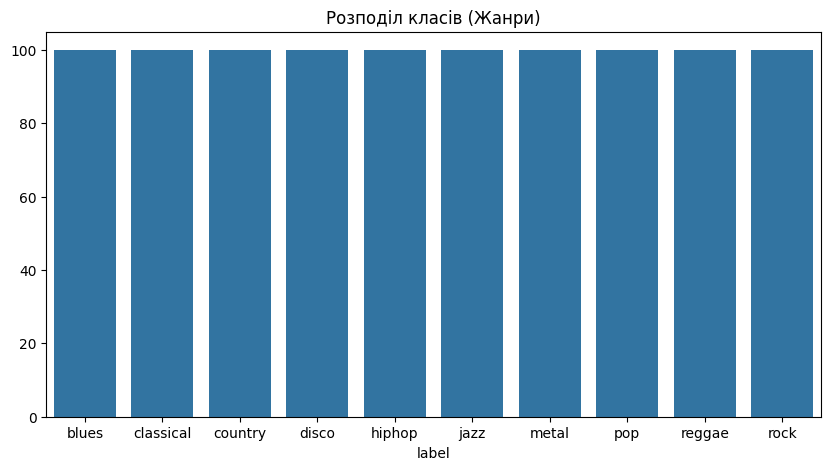

In [9]:
# Візуалізація балансу
plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Розподіл класів (Жанри)')
plt.show()

In [10]:
# 6. Створення навчального набору предикторів X та цілей Y
X = df.drop('label', axis=1).values
y = df['label'].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) #0 1 2 ...

y_categorical = to_categorical(y_encoded) #One hot encoding

class_names = label_encoder.classes_
class_names

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [11]:
# 7. Розбити набір даних на навчальну та тестову множини
# Використовуємо stratify=y_encoded, щоб зберегти баланс класів при розбитті
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

In [12]:
# 8. Стандартизувати предиктори X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Розмірність X_train: {X_train.shape}")
print(f"Розмірність X_test: {X_test.shape}")

Розмірність X_train: (800, 26)
Розмірність X_test: (200, 26)


In [13]:
# 9. Створити модель нейронної мережі прямого розповсюдження
model = Sequential()

# Вхідний шар + Перший прихований шар
# Кількість входів = кількості ознак (X_train.shape[1])
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Другий прихований шар
model.add(Dense(32, activation='relu'))

# Вихідний шар
# 10 нейронів, тому що 10 жанрів. Активація softmax для мультикласової класифікації
model.add(Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 4,138
Trainable params: 4,138
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 10. Навчити нейронну мережу
# Використовуємо 20% навчальних даних для валідації в процесі навчання
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/50
20/20 [==============================] - 2s 31ms/step - loss: 2.2967 - accuracy: 0.1766 - val_loss: 2.1022 - val_accuracy: 0.3000
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 1.9631 - accuracy: 0.3453 - val_loss: 1.8905 - val_accuracy: 0.3438
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 1.7591 - accuracy: 0.3938 - val_loss: 1.7460 - val_accuracy: 0.3625
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 1.6072 - accuracy: 0.4328 - val_loss: 1.6502 - val_accuracy: 0.3750
Epoch 5/50
20/20 [==============================] - 0s 7ms/step - loss: 1.4903 - accuracy: 0.4984 - val_loss: 1.5625 - val_accuracy: 0.4250
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 1.3917 - accuracy: 0.5312 - val_loss: 1.5065 - val_accuracy: 0.4625
Epoch 7/50
20/20 [==============================] - 0s 7ms/step - loss: 1.3147 - accuracy: 0.5547 - val_loss: 1.4536 - val_accuracy: 0.4938
Epoch 8/50
20/20 [=

In [15]:
# 11. Оцінити якість роботи на тестовій множині
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nТочність на тестовій множині: {test_acc:.4f}")


Точність на тестовій множині: 0.6250


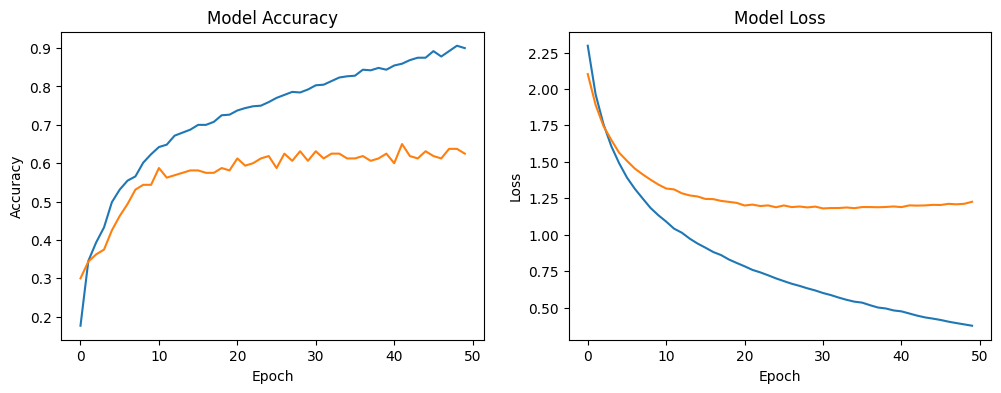

In [16]:
# 12. Побудувати графік залежності критерію якості
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [17]:
# 13. Подати на вхід довільний зразок із тестової вибірки
# Вибираємо випадковий індекс
random_idx = random.randint(0, len(X_test) - 1)
sample_data = X_test[random_idx].reshape(1, -1) # Решейп для подачі в модель (1, n_features)
true_label_idx = np.argmax(y_test[random_idx])
true_label = class_names[true_label_idx]

# Передбачення
prediction = model.predict(sample_data)
predicted_class_idx = np.argmax(prediction)
predicted_label = class_names[predicted_class_idx]
confidence = np.max(prediction) * 100

print(f"\nІстинний клас: {true_label}")
print(f"Передбачено клас {predicted_label} з достовірністю {confidence:.2f}%")

1/1 [==============================] - 0s 229ms/step

Істинний клас: metal
Передбачено клас hiphop з достовірністю 79.91%


In [18]:
# 14: Оптимізація
# Створення покращеної моделі
model_opt = Sequential()

# Підхід 2: Більше нейронів (256 замість 64)
model_opt.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

# Підхід 1: Dropout (викидаємо 30% нейронів випадковим чином при навчанні)
model_opt.add(Dropout(0.3))

model_opt.add(Dense(128, activation='relu'))
model_opt.add(Dropout(0.3))

model_opt.add(Dense(64, activation='relu'))

model_opt.add(Dense(10, activation='softmax'))

# Компіляція
model_opt.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

# Підхід 3: Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_opt = model_opt.fit(X_train, y_train, 
                            epochs=100, # Ставимо більше епох, EarlyStopping зупинить раніше якщо треба
                            batch_size=32, 
                            validation_split=0.2, 
                            callbacks=[early_stop],
                            verbose=1)

# Оцінка покращеної моделі
test_loss_opt, test_acc_opt = model_opt.evaluate(X_test, y_test, verbose=0)
print(f"\nТочність початковa: {test_acc:.4f}  покращена: {test_acc_opt:.4f}")

Epoch 1/100
20/20 [==============================] - 2s 37ms/step - loss: 2.1706 - accuracy: 0.2391 - val_loss: 1.9834 - val_accuracy: 0.3125
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 1.8270 - accuracy: 0.3594 - val_loss: 1.7244 - val_accuracy: 0.3375
Epoch 3/100
20/20 [==============================] - 0s 12ms/step - loss: 1.5933 - accuracy: 0.4437 - val_loss: 1.5642 - val_accuracy: 0.4437
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 1.4468 - accuracy: 0.4766 - val_loss: 1.4564 - val_accuracy: 0.4625
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 1.2965 - accuracy: 0.5312 - val_loss: 1.3844 - val_accuracy: 0.5188
Epoch 6/100
20/20 [==============================] - 0s 13ms/step - loss: 1.2565 - accuracy: 0.5141 - val_loss: 1.3066 - val_accuracy: 0.5562
Epoch 7/100
20/20 [==============================] - 0s 16ms/step - loss: 1.1709 - accuracy: 0.5891 - val_loss: 1.3036 - val_accuracy: 0.5250
Epoch 

---

In [19]:
import joblib
from tensorflow.keras.models import load_model

# Зберігаємо саму модель (архітектуру та ваги)
model_opt.save('dump\music_genre_model.h5')

# Зберігаємо скейлер (щоб потім правильно обробляти нові дані)
joblib.dump(scaler, 'dump\scaler.pkl')

# Зберігаємо енкодер міток (щоб знати, яка цифра відповідає якому жанру)
joblib.dump(label_encoder, 'dump\label_encoder.pkl')

print("Модель, скейлер та енкодер міток збережено.")

Модель, скейлер та енкодер міток збережено.


In [24]:
print('Start load packages ...', end=' ')

import numpy as np
import librosa
import joblib
from tensorflow.keras.models import load_model
import time

print('end \n')

def get_features(file_path, target_size):
    try:
        y, sr = librosa.load(file_path, duration=30, mono=True)
    except Exception:
        return None

    raw_feats = [
        librosa.feature.chroma_stft(y=y, sr=sr),
        librosa.feature.rms(y=y),
        librosa.feature.spectral_centroid(y=y, sr=sr),
        librosa.feature.spectral_bandwidth(y=y, sr=sr),
        librosa.feature.spectral_rolloff(y=y, sr=sr),
        librosa.feature.zero_crossing_rate(y)
    ]
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    features = [np.mean(f) for f in raw_feats] + [np.mean(e) for e in mfcc]

    if len(features) < target_size:
        features += [np.var(f) for f in raw_feats] + [np.var(e) for e in mfcc]

    if len(features) != target_size:
        return None

    return np.array(features).reshape(1, -1)

model =  load_model('dump\music_genre_model.h5')
scaler = joblib.load( 'dump\scaler.pkl')
encoder= joblib.load( 'dump\label_encoder.pkl')

input_size = model.input_shape[-1]
print(f"Модель завантажено. Очікувана кількість ознак: {input_size}\n")

def mp3predict(mp3Path):
    print(f"'{mp3Path}'")

    timeStart = time.time()
  
    X = get_features(mp3Path, input_size) 

    if X is not None:
        X_scaled = scaler.transform(X)
        pred_probs = model.predict(X_scaled, verbose=0)
        
        probs = pred_probs.flatten()
        print("Прогноз по класам:")
        for cls, p in zip(encoder.classes_, probs):
            print(f"  {cls:<12} {p*100:6.2f}%")
    else:
        print(f"ПОМИЛКА")
        pass

    print(f"\nЧас обробки: {time.time() - timeStart:.6f} с\n")

Start load packages ... end 

Модель завантажено. Очікувана кількість ознак: 26



In [ ]:
mp3predict('test\Ethos - Midnight.mp3')

'test\Ethos - Midnight.mp3'
Прогноз по класам:
  blues          6.33%
  classical      0.04%
  country       32.84%
  disco          0.01%
  hiphop         0.04%
  jazz          58.64%
  metal          0.01%
  pop            0.05%
  reggae         0.90%
  rock           1.12%

Час обробки: 1.048555 с



In [28]:
mp3predict('test\SoundForYou - Blues Rock Trailer (Instrumental Stoner Blues-Rock Trailer).mp3')

'test\SoundForYou - Blues Rock Trailer (Instrumental Stoner Blues-Rock Trailer).mp3'
Прогноз по класам:
  blues          0.34%
  classical      0.01%
  country        0.80%
  disco         25.80%
  hiphop        18.04%
  jazz           0.07%
  metal          4.85%
  pop            0.78%
  reggae         0.91%
  rock          48.41%

Час обробки: 3.317233 с



In [29]:
mp3predict('test\Hawkin - Woods.mp3')

'test\Hawkin - Woods.mp3'
Прогноз по класам:
  blues          0.00%
  classical     86.40%
  country        0.01%
  disco          0.07%
  hiphop         1.71%
  jazz           5.81%
  metal          0.00%
  pop            0.50%
  reggae         5.50%
  rock           0.01%

Час обробки: 2.930457 с

